# Ausreißer

Zunächst betrachten wir die *numerischen* Daten des Datensatzes. Diese kann man mit Hilfe von vorgegebenen Funktionen identifizieren. Darüberhinaus kann ein Blick in die Beschreibungsdatei des Datensatzes "data_description.txt" geworfen werden.

In [2]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../data/house-prices-advanced-regression-techniques"]).decode("utf8")) #check the files available in the directory

import pickle

all_data.pkl
data_description.txt
test.csv
test.pkl
test_1.pkl
train.csv
train.pkl
train_1.pkl
x_preprocessed.pkl
x_preprocessed_train.pkl
x_test.pkl
y_train.pkl



# Daten initial laden


In [6]:
train = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

print("Dimension des Trainingssets: " + str (train.shape))
print("Dimension des Testsets: " + str (test.shape))

Dimension des Trainingssets: (1460, 81)
Dimension des Testsets: (1459, 80)


In [ ]:
## man kann einfach den namen in der zelle allein schreiben und ausführen lassen und dannist es wie View(dieVariable)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# ID Spalten

In [8]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


In [9]:
# numerische Daten

numerical_features = train.select_dtypes(include=[np.number])
print ("Es gibt " + str(numerical_features.columns.size) + " numerische Spalten.\n")
for name in numerical_features.columns.sort_values():
    print (name)


Es gibt 37 numerische Spalten.

1stFlrSF
2ndFlrSF
3SsnPorch
BedroomAbvGr
BsmtFinSF1
BsmtFinSF2
BsmtFullBath
BsmtHalfBath
BsmtUnfSF
EnclosedPorch
Fireplaces
FullBath
GarageArea
GarageCars
GarageYrBlt
GrLivArea
HalfBath
KitchenAbvGr
LotArea
LotFrontage
LowQualFinSF
MSSubClass
MasVnrArea
MiscVal
MoSold
OpenPorchSF
OverallCond
OverallQual
PoolArea
SalePrice
ScreenPorch
TotRmsAbvGrd
TotalBsmtSF
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


In [10]:
numerical_features.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000,8450,7,5,2003,2003,196.000,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.000,9600,6,8,1976,1976,0.000,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.000,11250,7,5,2001,2002,162.000,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.000,9550,7,5,1915,1970,0.000,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.000,14260,8,5,2000,2000,350.000,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.000,14115,5,5,1993,1995,0.000,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.000,10084,8,5,2004,2005,186.000,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.000,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.000,6120,7,5,1931,1950,0.000,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.000,7420,5,6,1939,1950,0.000,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [ ]:
# man muss verständnis für die daten entwickeln, zb was zum fuck ist LowQualFinSF? --> in data-description gehen und nach der variable suchen und dann steht da für gewöhnlcih mehr
# und dann in daten sieht man, dass es iwie viel 0 ist, also mal gucken, wo überhaupt kein 0 ist 
# frage ist, sind diese 26, (die man sieht mit dem Ausführen hier) Ausreißer?
train[(train['LowQualFinSF'] > 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
51,50,RM,52.000,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
88,50,C (all),105.000,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
125,190,RM,60.000,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
170,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,75,RM,90.000,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
187,50,RL,60.000,10410,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,135000
197,75,RL,174.000,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
198,75,RM,92.000,5520,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000
263,50,RM,50.000,5500,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,130000
267,75,RL,60.000,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500


In [ ]:
# describe kann man so halt nutzen, um mehr Verständnis für die Daten zu bekommen
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000
BsmtFinSF2,1460.000,46.549,161.319,0.000,0.000,0.000,0.000,1474.000


# Ausreißer

Ausreißer sind Werte (einer Spalte), die stark von der "generellen Tendenz" der Mehrzahl der Daten abweichen. Dies kann sowohl für diskrete als auch für kontinuierliche numerische Daten gelten. Ausreißer können aufgrund verschiedener Ursachen entstehen:

* **Natürlich**: Hier handelt es sich um Ausreißer, die "in der Natur der Daten liegen" und gelten nicht als Fehler.
* **Eingabefehler**: Wenn Menschen (aber auch Maschinen, z. B. beim OCR) Daten erfassen, können Eingabefehler (Tippfehler, Erfassungsfehler, Ungenauigkeiten) vorliegen.
* **Messfehler**: Messungen sind immer nur so genau, wie ihr Sensor. Auch Sensoren können zufällig Ausreißer erzeugen.
* **Beschädigte Daten**: Bei der Verarbeitung (oder z. B. Konvertierung) von Daten können Fehler entstanden sein.

## Leseempfehlungen
[Sadrach Pierre, 2022, "How to Find Outliers (With Examples)"](https://builtin.com/data-science/how-find-outliers-examples)

[Schendera, C. 2007. Datenqualität mit SPSS. München, S. 163-174](https://www.degruyter.com/document/doi/10.1524/9783486710694/html?lang%253Dde)

# Umgang mit Ausreißern

Werden Daten - und deren Ausreißer - im maschinellen Lernen verarbeitet, hat dies Einfluss auf das Training, mithin also auf die Güte des Modells. Im ungünstigen Fall, wird die **Güte des Modells negativ beeinflusst**.

**Jedoch sind nicht alle Ausreißer negativ**, sondern bilden den Untersuchungsgegenstand ab. Werden z. B. Röntgenbilder durch ein Modell des maschinellen Lernens für das Trainig einer computergestützten Diagnostik eingesetzt, dann wird man z. B. nach prävalenten und nicht prävalenten Daten unterscheiden (Krankheit liegt vor | Krankeit liegt nicht vor). Ist die Krankheit selten auf den Bildern zu sehen, könnten diese als Ausreißer betrachtet werden, was nicht im Sinne der Modellierung ist.

Sie müssen sich also Fragen, ob die Ausreißer durch Fehler verursacht sind, oder in der "Natur der Sache" liegen.

=> **Ausreißer, die durch Fehler verursacht sind, _müssen_ entfernt werden.**
=> **Ausreißer, die den zu modellierenden Gegenstand abbilden, dürfen _nicht_ entfernt werden.**
Wenn man aber Sonderfälle hat, müsste man ein eigenes Modell machen für solche Sonderfälle, weil dann wär das der Normalfall, denn wenn wir es jetzt hier im Modell drinnenlassen, trainieren wir falsch, weil es halt n Ausreißer ist es das Modell verwirrt (Testdaten sind nie gut mit ausreißern, weil es das Modell verwirrt)

## Überblick verschaffen
### Boxplots
Boxplots verwenden in der Standardeinstellung wie wir sie in der Abbildung sehen die Interquartile Range (IQR) - Methode für die Ausreißererkennung. Die IQR-Methode funktioniert wie folgt:
1. Das 25%-Quantil (Q1) berechnen
2. Das 75%-Quantil (Q3) berechnen
3. Q1 von Q3 subtrahieren (ergibt die Höhe der Box im Boxplot) = iqr
4. Die untere Grenze berechnen durch Q1 - (Faktor * iqr)
5. Die obere Grenze berechnen durch Q3 + (Faktor * iqr)

Wobei der Faktor variabel ist. Die Standardeinstellung beträgt 1,5.

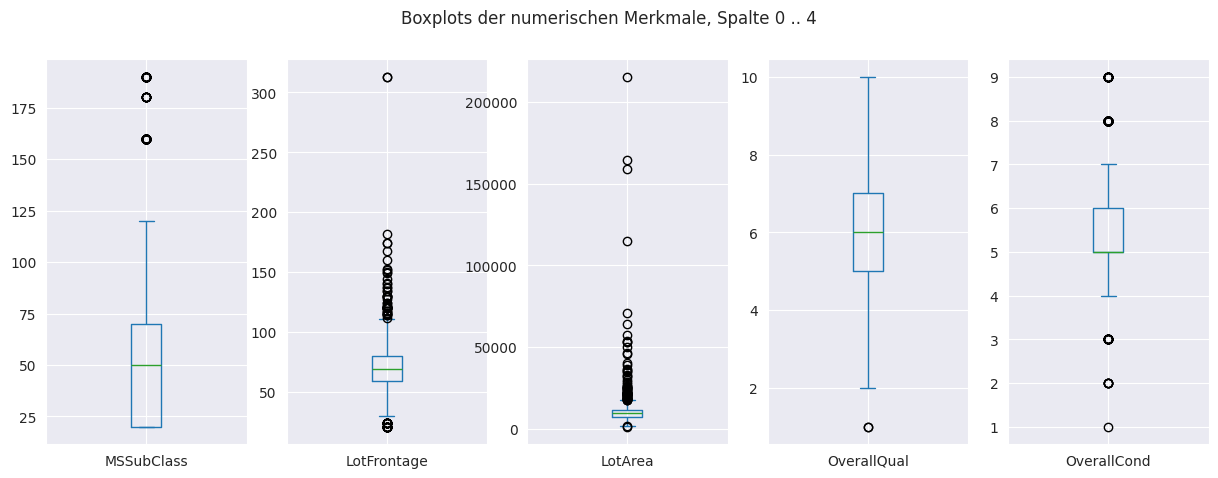

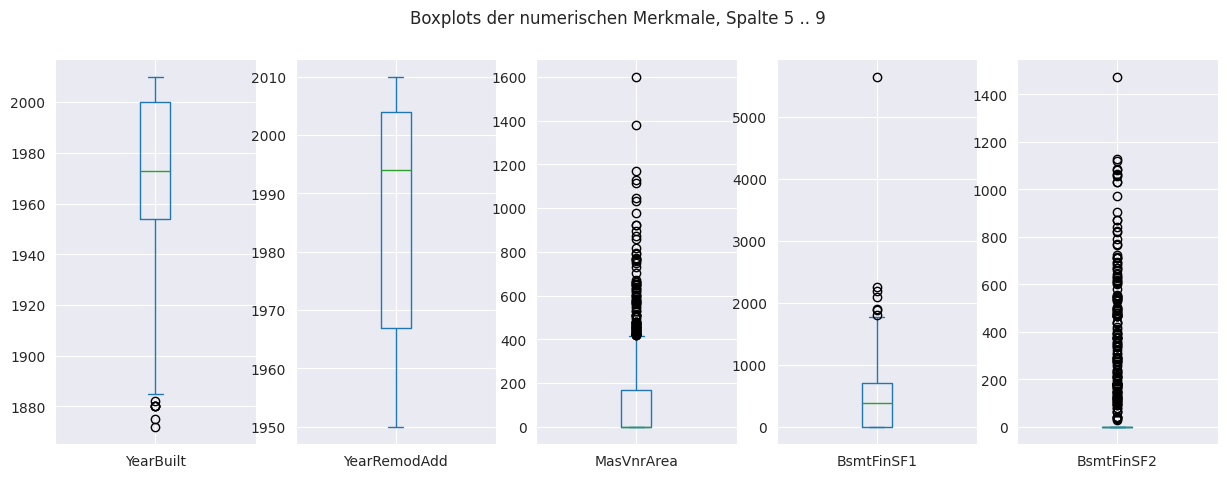

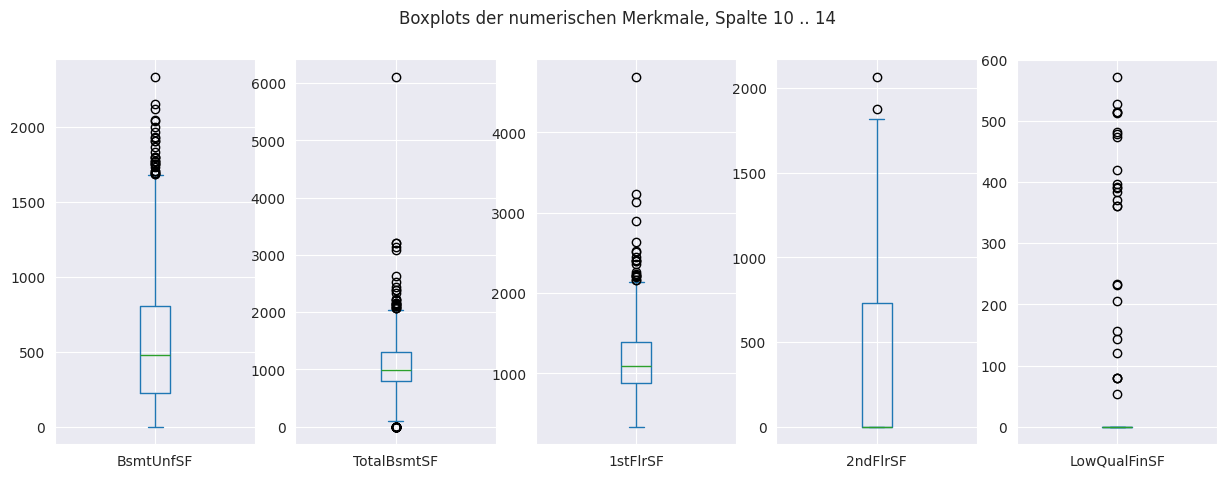

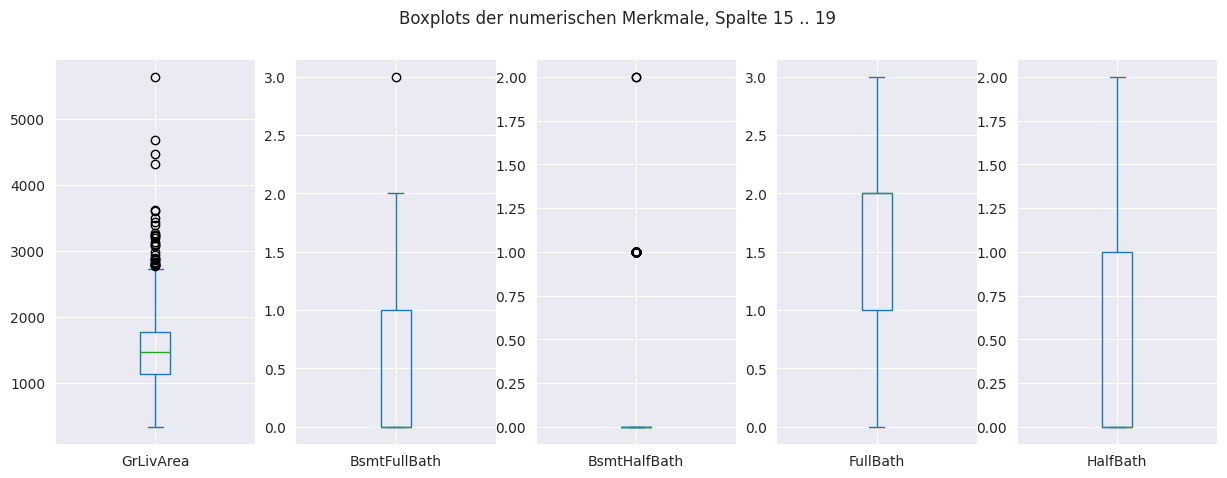

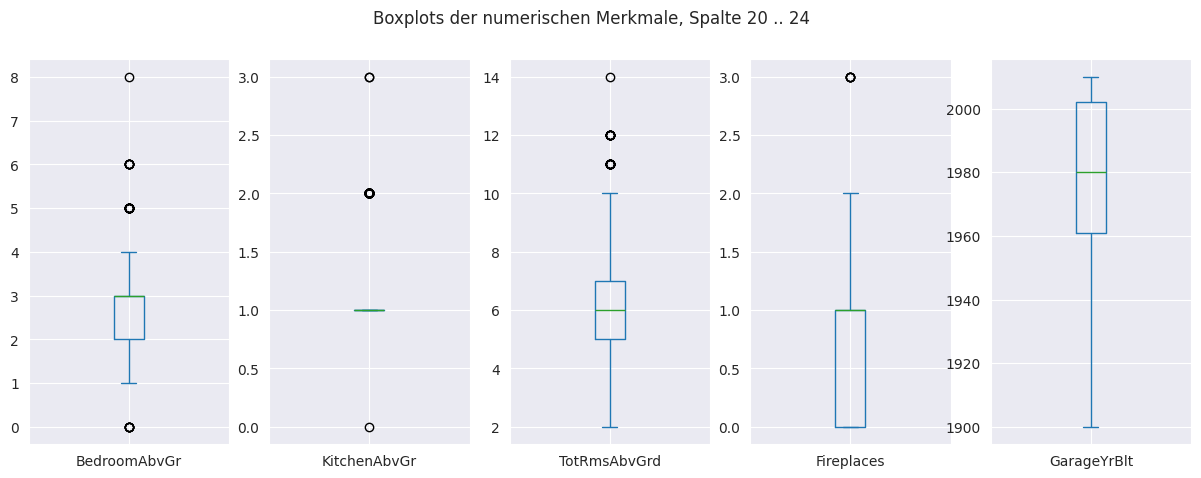

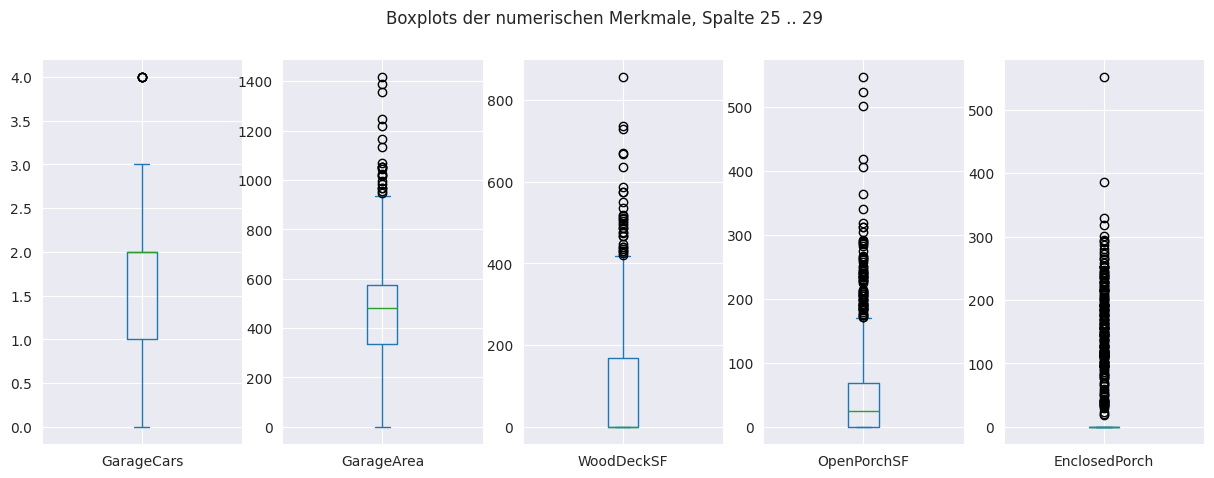

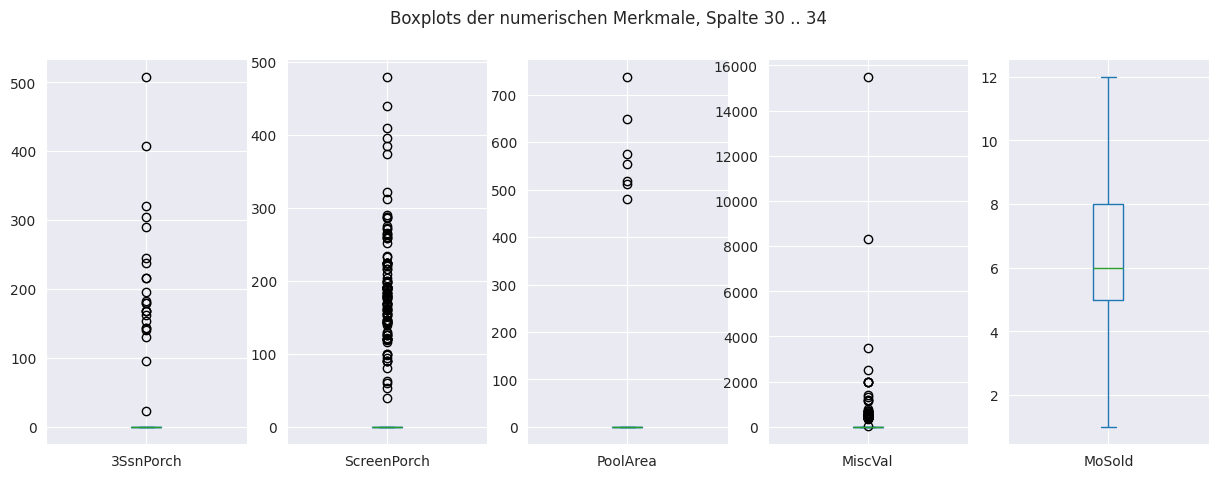

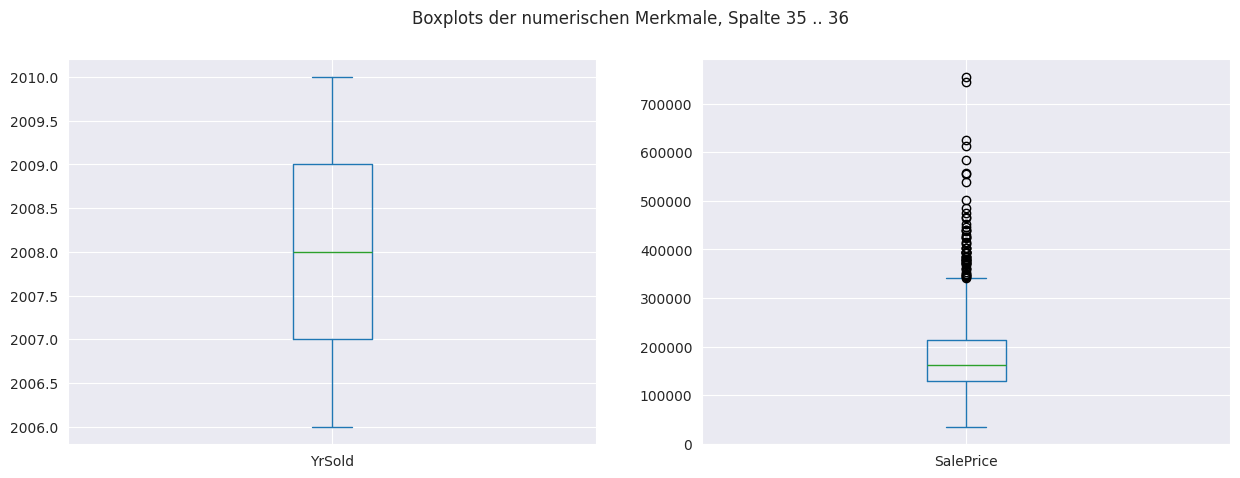

In [13]:
start = 0
anf = start
end = 0
while end < numerical_features.columns.size:
    end = anf + 5
    if end > numerical_features.columns.size:
        end = numerical_features.columns.size
    subset = numerical_features.iloc[:, anf:end]
    #print (min, max, subset.shape, subset.columns)
    subset.plot(kind="box",subplots=True,figsize=(15,5),title="Boxplots der numerischen Merkmale, Spalte " + str (anf) + " .. " + str (end -1));
    anf = end

#numerical_features.plot(kind="box",subplots=True,figsize=(150,25),title="Boxplots der numerischen Merkmale");


# Korrelationen

<Axes: >

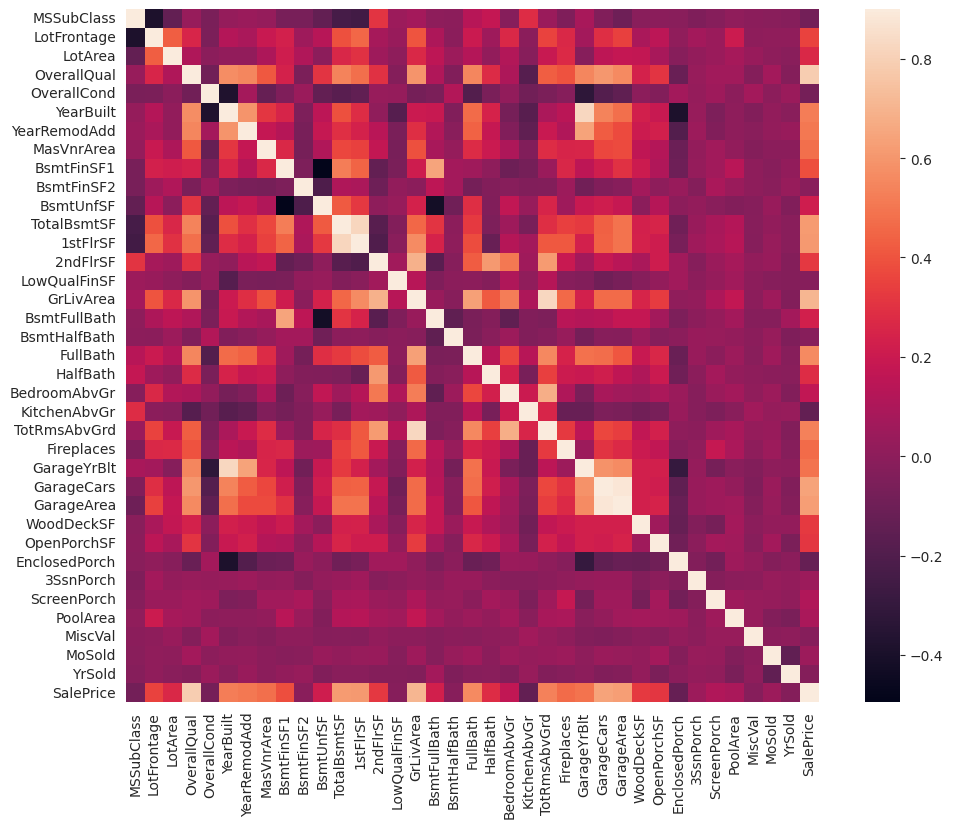

In [ ]:
# Eine Korrelationsmatrix (Correlation map) zeigt an, wie die einzelnen Features mit dem SalePrice korrelieren
corrmat = train.select_dtypes(include=[np.number]).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


<Axes: >

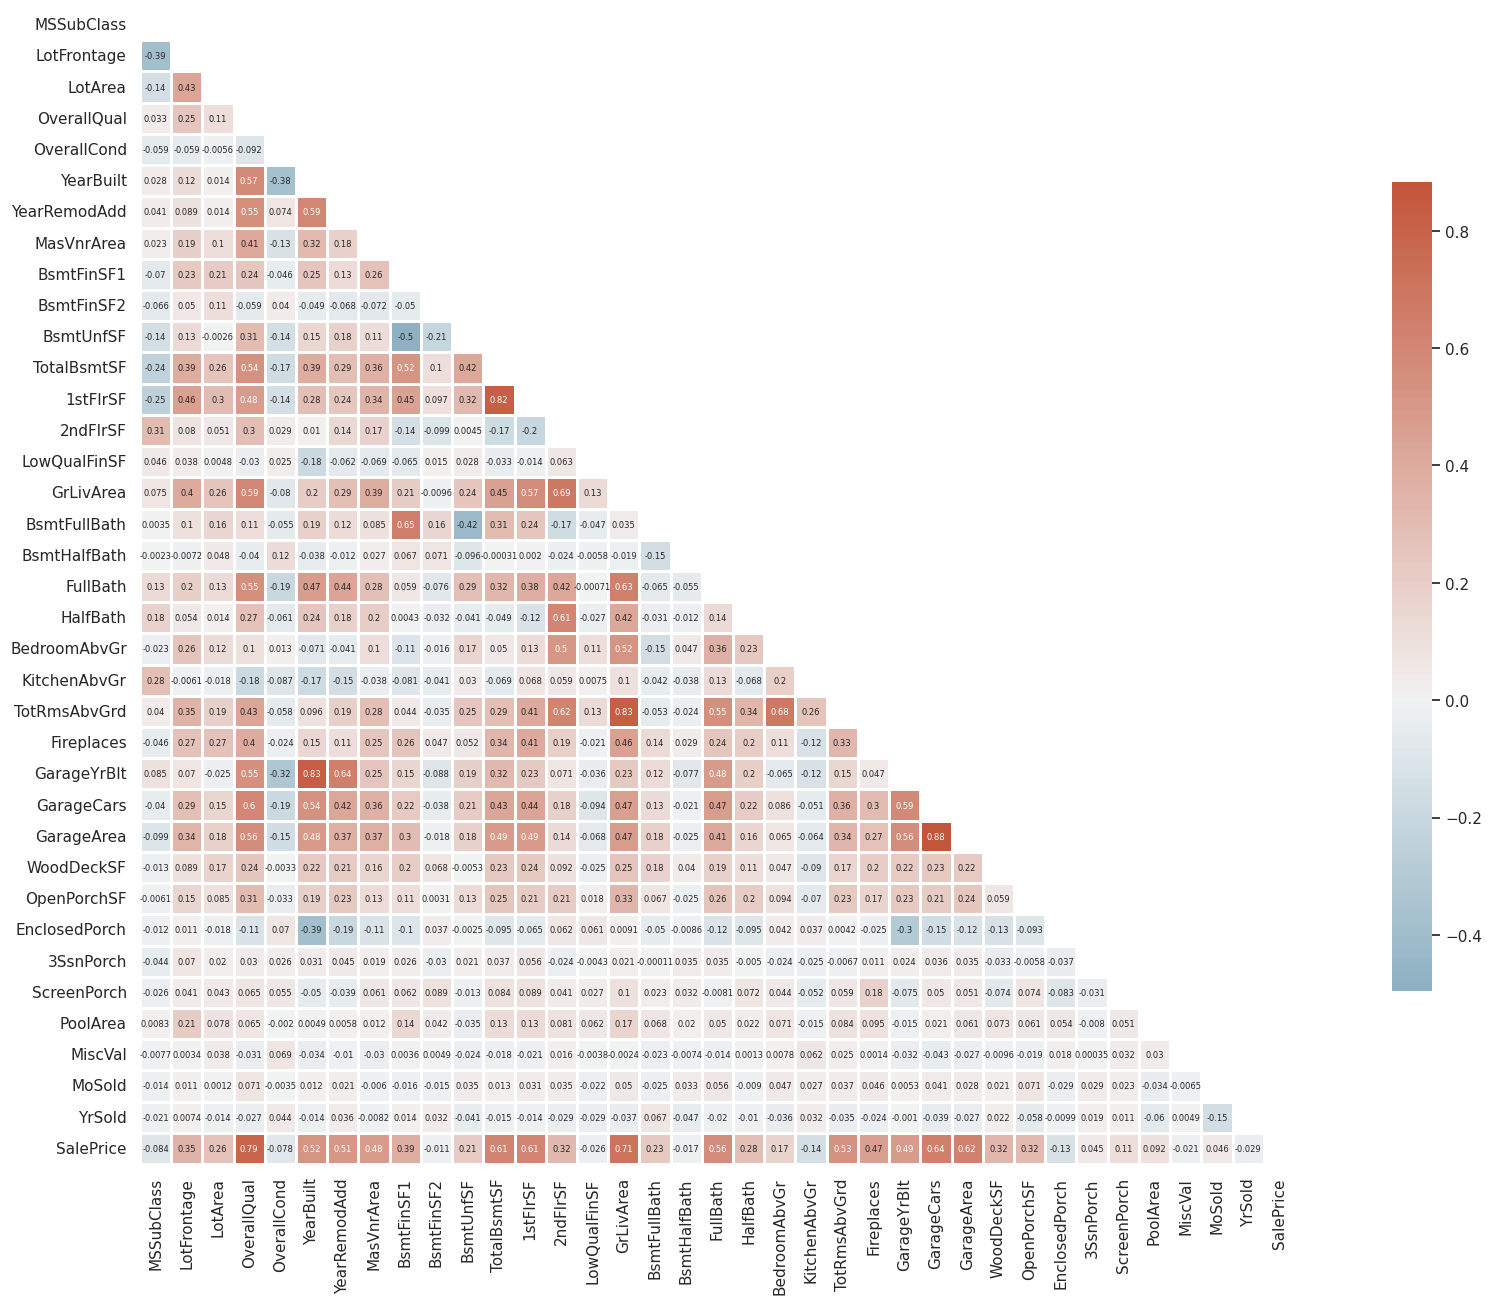

In [ ]:
#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html 

sns.set_theme(style="white")

# Korrelationsmatrix berechnen
corr = train.select_dtypes(include=[np.number]).corr()

# Wir erzeugen eine Maske für das obere Dreieck (sonst sieht es aus wie das Quadrat, das wir oben hatten, und ist überflüssig)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setup matplotlib Grafik
f, ax = plt.subplots(figsize=(25, 15))

# Wir erzeugen eine benutzerdefinierte divergierende Farbkarte
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Korrelationsmatrix zeichnen
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .7}, annot=True, annot_kws={"fontsize":6})
#obviously many of thes variables are HIGHLY correlated. Something we may want to explore is why Average percentage viewed is negatively related to RPM

# Vgl. https://www.kaggle.com/code/kenjee/basic-eda-example-section-6

# je roter, desto mehr korreliert

# Scatter Plot ausgesuchter Spalten

# Korrelation zw. der Größe und dem Verkaufspreis

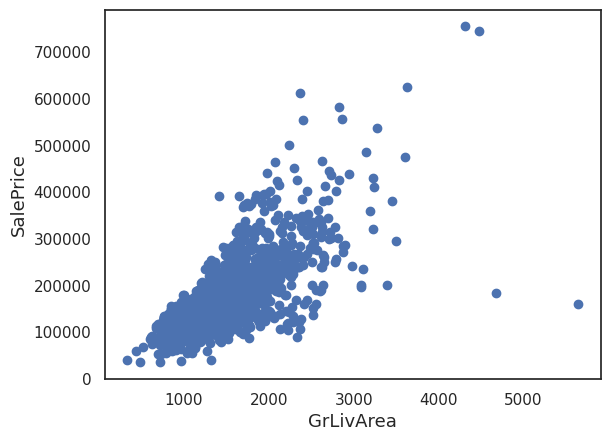

In [ ]:
# grLivArea korreliert stark mit Kaufsprice und jetzt wollen wir das mal besser sehen (je größer die wohnfläche desto größer der preis)
# gibt aber auch ne range und wir haben auch diese große wohnfläche niedriger preis ausreißer und die müssen wir loswerden, weil wir sonst nicht gut trainieren
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Löschen der Ausreißer

In [18]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


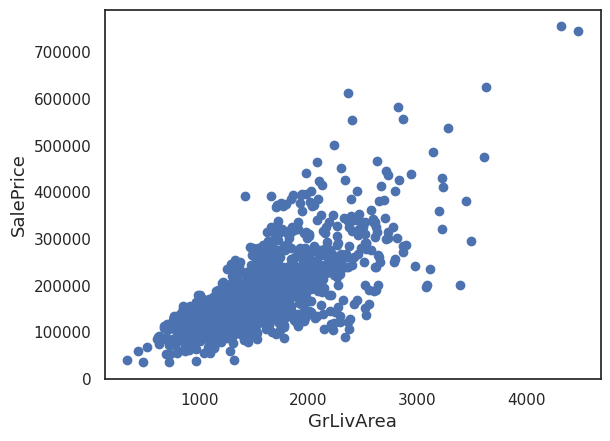

In [19]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Korrelation zw. der "Overall Quality" und dem Verkaufspreis

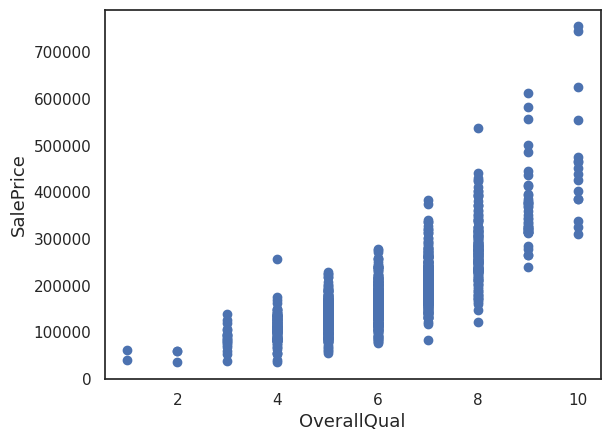

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

# man sieht hier immer breite ranges des verkaufpreies (lang nach obe und unten) zb bei der 8 zw 100.000 und 500.000 und
# das bringt uns also noch nichts

Wir entscheiden uns hier, **keine** Ausreißer zu entfernen, da hier z. B. auch noch die Größe, Anzahl Zimmer etc. einfließt.

Wahrscheinlich gibt es noch weitere Ausreißer in den Trainingsdaten. Das Entfernen aller Ausreißer könnte sich jedoch negativ auf unsere Modelle auswirken, wenn es auch Ausreißer in den Testdaten gäbe. Deshalb werden wir nicht alle Ausreißer entfernen, sondern nur einige unserer Modelle für sie robust machen. Sie können sich dazu auf den Modellierungsteil dieses Notizbuchs beziehen.

Die Entfernung von Ausreißern ist nicht immer sicher. Wir werden lediglich zwei Spalten mit Ausreißern entfernen, da sie sehr groß und wirklich schlecht sind (extrem große Flächen zu sehr niedrigen Preisen).
 
[Documentation] Weiterführende Informationen zeigen verschiedene Ausreißer der Daten. [^1].

[^1]: http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt

In [ ]:
# Sichern der Zwischenergebnisse müssen iwr nicht ausführen
with open('../data/house-prices-advanced-regression-techniques/train.pkl', 'wb') as handle:
    pickle.dump(train, handle)
with open('../data/house-prices-advanced-regression-techniques/test.pkl', 'wb') as handle:
    pickle.dump(test, handle)